# Arbitrary Linear Transformation

This model shows that any linear transformation between ensembles can be easily computed by selecting an appropriate value for the "transform". It provides an example of computing linear transformations using vector representations.

Network diagram:

      [input - 2D] ---> (x - 2d) ---> (z - 3D)

A two-dimensional input signal is first fed into a two-dimensional neuronal ensemble `x` , which then projects it on to another three-dimensional ensemble `z`.

In [1]:
#Setup the environment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nengo

## Create the Model

This model contains the parameters as described in the book. Setting the transform equal to the 'weight_matrix' is analogous to entering the weights in the "2 to 3 Coupling Matrix" window in Nengo 1.4 GUI as described in the book. 

In [2]:
#Create a 'model' object to which we can add ensembles, connections, etc.  
model = nengo.Network(label="Arbitrary Linear Transformation")
with model:
    #Two-dimensional input signal with constant values of 0.5 and -0.5 in two dimensions
    input = nengo.Node(lambda t: [.5,-.5])
      
    #Ensembles with 200 LIF neurons having dimentions 2 and 3
    x = nengo.Ensemble(200, dimensions=2)
    z = nengo.Ensemble(200, dimensions=3)
       
    #Connect the input to ensemble x
    nengo.Connection(input, x)
    
    #Connect ensemble x to ensemble z using a weight matrix
    weight_matrix = [[0.0, 1.0], [1.0, 0.0], [0.5, 0.5]]   
    nengo.Connection(x, z, transform = weight_matrix)

## Run the Model

In [ ]:
#Import the nengo_gui visualizer to run and visualize the model.
from nengo_gui.ipython import IPythonViz
IPythonViz(model, "arbitrary_linear.py.cfg")

Press the play button in the visualizer to run the simulation. You should see the graphs as shown in the figure below.

The graphs show a two-dimesional input linearly projected on to a two-dimensional ensemble of neurons (`x`), which further linearly projects it on to a three-dimesional neuronal ensemble (`z`). You can use the sliders to change the input values provided by the input node.

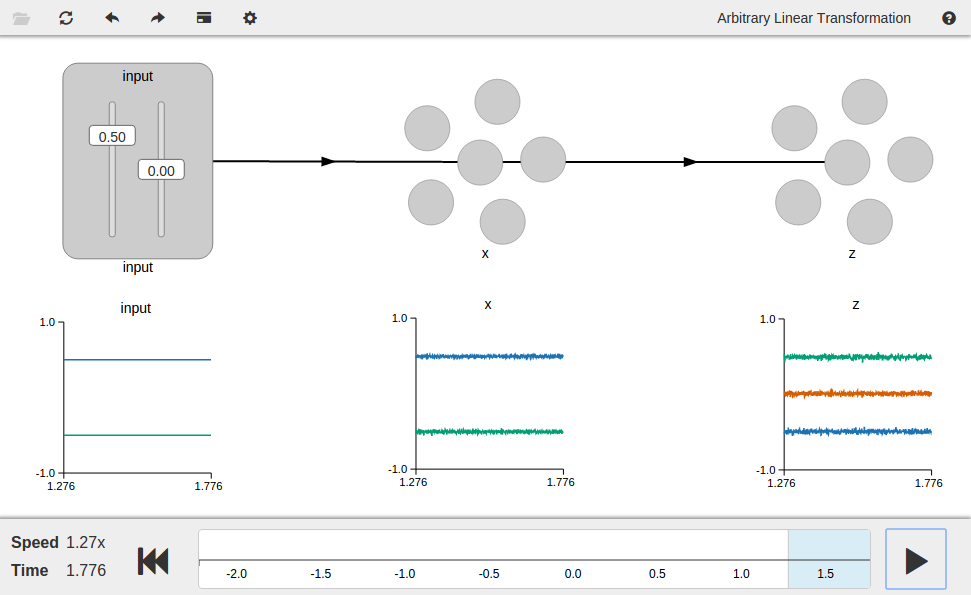

In [5]:
from IPython.display import Image
Image(filename='arbitrary_linear.png')